In [12]:
import numpy as np
import scipy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import csv

In [23]:
with open('IRIS.csv','r') as iris:
    rows = list(csv.reader(iris))[1:]
sepal_l = list(map(lambda r: float(r[0]),rows))
sepal_w = list(map(lambda r: float(r[1]),rows))
petal_l = list(map(lambda r: float(r[2]),rows))
species = list(map(lambda r: r[8], rows))

In [32]:
stats.itemfreq(species)

array([['setosa', '31'],
       ['versicolor', '34'],
       ['virginica', '34']], 
      dtype='<U21')

In [25]:
keys = [i[0] for i in stats.itemfreq(species)]
counts = [int(i[1]) for i in stats.itemfreq(species)]

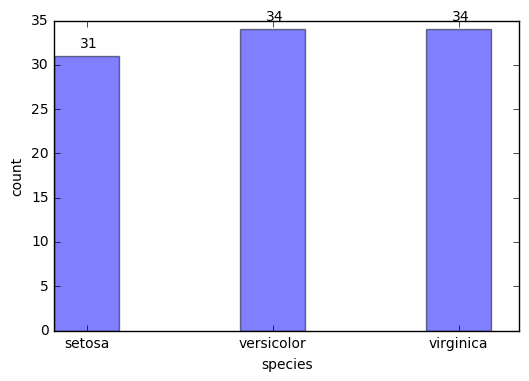

In [35]:
plt.bar(np.arange(len(keys)), counts, width = 0.35, alpha = 0.5)
plt.xticks(np.arange(3) + 0.35/2, keys, fontsize = 10)
plt.xlabel('species')
plt.ylabel('count')
for i in range(len(keys)):
    plt.text(i + 0.14, counts[i]+1, str(counts[i]))

In [37]:
stats.describe(sepal_l)

DescribeResult(nobs=99, minmax=(4.2999999999999998, 7.9000000000000004), mean=5.9222222222222216, variance=0.73419501133786835, skewness=0.24659848175801716, kurtosis=-0.665911490359218)

In [38]:
stats.describe(sepal_l).minmax

(4.2999999999999998, 7.9000000000000004)

([], <a list of 0 Text xticklabel objects>)

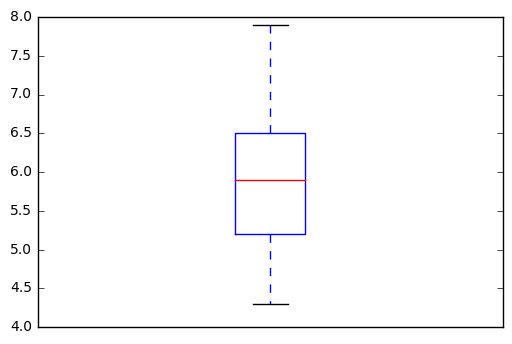

In [44]:
plt.boxplot(sepal_l)
plt.xticks([])

In [47]:
q1 = np.percentile(sepal_l,25)
medi = np.percentile(sepal_l,50)
q3 = np.percentile(sepal_l,75)

([], <a list of 0 Text xticklabel objects>)

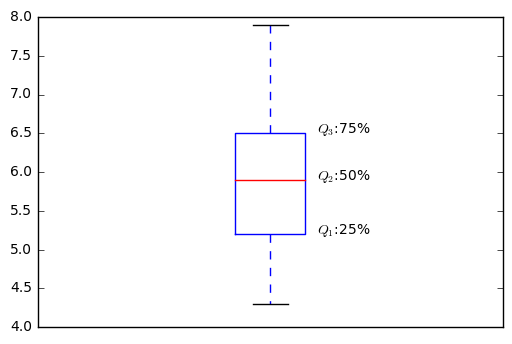

In [51]:
plt.boxplot(sepal_l)
plt.text(1.1,q1,'$Q_1$:25%')
plt.text(1.1,medi,'$Q_2$:50%')
plt.text(1.1,q3,'$Q_3$:75%')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

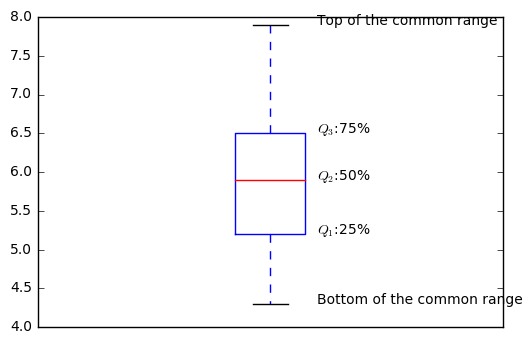

In [52]:
plt.boxplot(sepal_l)
top = min(q3+1.5*(q3-q1), max(sepal_l))
bottom = max(q1-1.5*(q3-q1),min(sepal_l))
plt.text(1.1, bottom, 'Bottom of the common range')
plt.text(1.1, top, 'Top of the common range')
plt.text(1.1,q1,'$Q_1$:25%')
plt.text(1.1,medi,'$Q_2$:50%')
plt.text(1.1,q3,'$Q_3$:75%')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

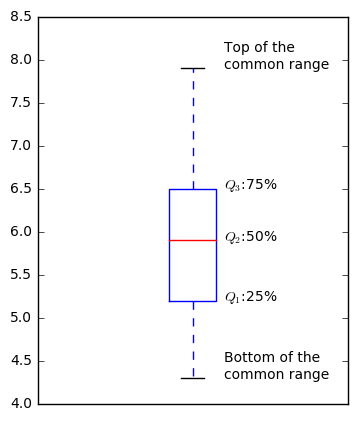

In [56]:
plt.rcParams['figure.figsize'] = 4,5
plt.ylim((4.0, 8.5))
plt.boxplot(sepal_l)
top = min(q3+1.5*(q3-q1), max(sepal_l))
bottom = max(q1-1.5*(q3-q1),min(sepal_l))
plt.text(1.1, bottom, 'Bottom of the\ncommon range')
plt.text(1.1, top, 'Top of the\ncommon range')
plt.text(1.1,q1,'$Q_1$:25%')
plt.text(1.1,medi,'$Q_2$:50%')
plt.text(1.1,q3,'$Q_3$:75%')
plt.xticks([])

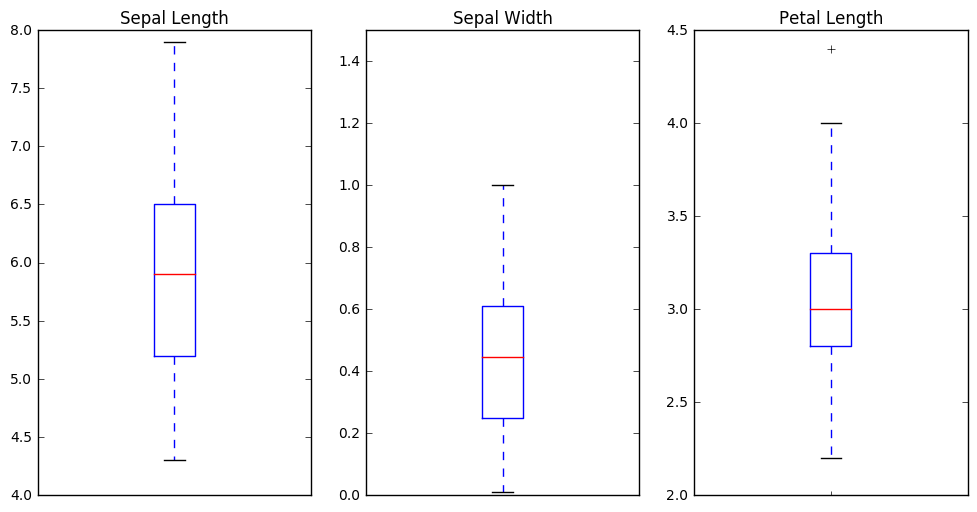

In [60]:
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(131); plt.boxplot(sepal_l); plt.xticks([]); plt.title("Sepal Length")
plt.subplot(132); plt.ylim((0,1.5)); plt.boxplot(sepal_w); plt.xticks([]); plt.title("Sepal Width")
plt.subplot(133); plt.boxplot(petal_l); plt.xticks([]); plt.title("Petal Length")

In [69]:
bino_dist = stats.binom(2,1/2.0)

In [67]:
print(bino_dist.pmf(0))

0.16150558289


In [68]:
help(bino_dist.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x) method of scipy.stats._distn_infrastructure.rv_frozen instance



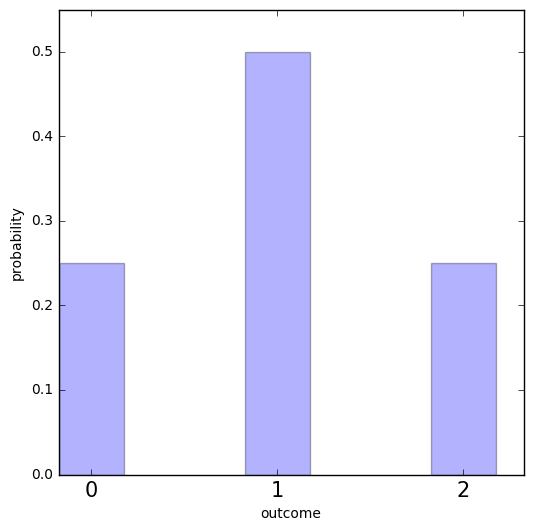

In [70]:
bino_dist = stats.binom(2,1/2.0)
plt.rcParams['figure.figsize'] = (8,6)
prob = [bino_dist.pmf(i) for i in range(3)]
plt.ylim((0,0.55))
plt.bar(range(11),prob, width=0.35, alpha=0.3)
plt.xticks(np.arange(3) + 0.35/2, range(3), fontsize=15)
plt.xlabel('outcome'); plt.ylabel('probability')

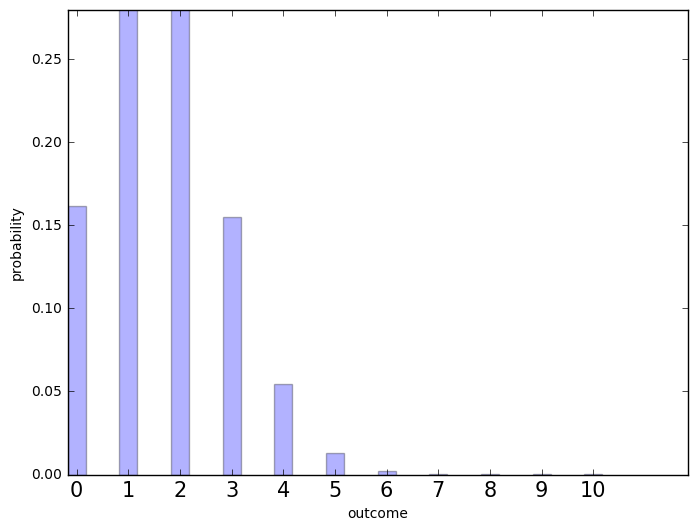

In [71]:
bino_dist1 = stats.binom(10,1/6.0)
plt.rcParams['figure.figsize'] = (8,6)
prob = [bino_dist1.pmf(i) for i in range(11)]
plt.ylim((0,0.28))
plt.bar(range(11),prob, width=0.35, alpha=0.3)
plt.xticks(np.arange(11) + 0.35/2, range(11), fontsize=15)
plt.xlabel('outcome'); plt.ylabel('probability')

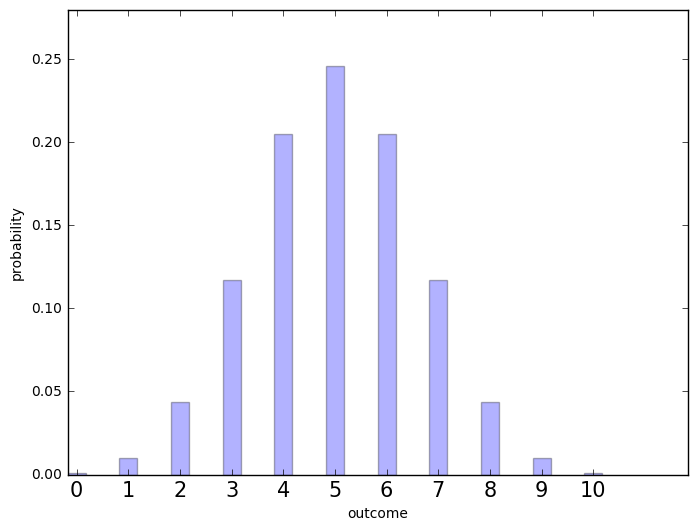

In [74]:
bino_dist2 = stats.binom(10,1/2.0)
plt.rcParams['figure.figsize'] = (8,6)
prob = [bino_dist2.pmf(i) for i in range(11)]
plt.ylim((0,0.28))
plt.bar(range(11),prob, width=0.35, alpha=0.3)
plt.xticks(np.arange(11) + 0.35/2, range(11), fontsize=15)
plt.xlabel('outcome'); plt.ylabel('probability')

In [75]:
rbino2 = bino_dist1.rvs(20000)

In [77]:
for i in range(11):
    print("%d ones: %f" % (i, np.mean(rbino2==i)))

0 ones: 0.159100
1 ones: 0.323600
2 ones: 0.294050
3 ones: 0.153400
4 ones: 0.055300
5 ones: 0.012550
6 ones: 0.001850
7 ones: 0.000150
8 ones: 0.000000
9 ones: 0.000000
10 ones: 0.000000


In [78]:
my_norm = stats.norm(0,1)

In [79]:
my_norm.cdf(0)

0.5

In [80]:
my_norm.cdf(1)

0.84134474606854293

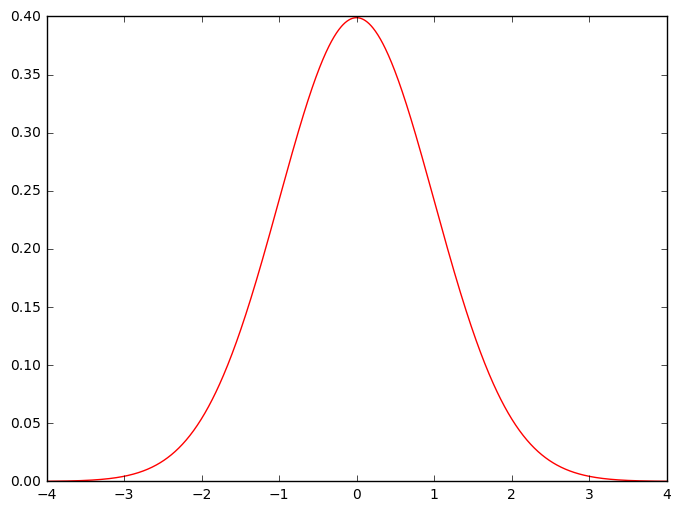

In [83]:
x = np.linspace(-4,4,1000)
plt.plot(x,stats.norm.pdf(x),'r')